In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

Метод наименьших квадратов

In [5]:
X.shape

(2, 10)

In [6]:
X.T.shape

(10, 2)

In [7]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

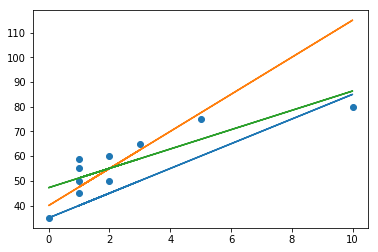

In [8]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [9]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [12]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [17]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [18]:
calc_mse(y, y_pred3)

45.93749999999999

In [19]:
calc_mae(y, y_pred3)

6.182142857142858

Градиентный спуск

In [20]:
# np.mean(y_pred - y)**2
# np.mean(w*x - y)**2
# np.sum(w*x - y)**2 / n
# 1/n * np.sum((w*x - y)**2)
# (w*x - y)**2

# 2*z*z`

# 2*x*(w*x - y) 
# 2*x*(w*x - y)

In [21]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [22]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [23]:
W[0] - g


47.232143060499986

1. Подберите скорость обучения (alpha) и количество итераций:

In [24]:
n = X.shape[1]
alpha =0.01
W = np.array([1, 0.5])
W, alpha, n

(array([1. , 0.5]), 0.01, 10)

In [25]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))

  if i % 100 == 0: 
      print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434


In [26]:
W,W.shape[0]

(array([47.23086913,  3.91094949]), 2)

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [27]:
n = X.shape[1]
alpha =0.01
W = np.array([1, 0.5])
W, alpha, n

(array([1. , 0.5]), 0.01, 10)

In [28]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
#   '''for ii in range(W.shape[0]):
#     W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
  W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))
  if i % 100 == 0:
      print(i, W, err)


0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434


Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [31]:
n = X.shape[1]
alpha =0.01
W = np.array([1, 0.5])
W, alpha, n

(array([1. , 0.5]), 0.01, 10)

In [32]:
tol=0.000001
i=0
while True:
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)

  W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))
   
  if i % 100 == 0:
      print(i, W, err)
  if err-calc_mse(y, np.dot(W, X))<tol:
      print(i, W, err)
      break
  i+=1


0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
808 [47.22276525  3.91244593] 45.937548276518484
